In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#load data
from google.colab import files
uploaded = files.upload()
df = pd.read_csv('breast-cancer.csv')
df.head()

Saving breast-cancer.csv to breast-cancer (1).csv


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
# number of rows and columns
df.shape

(569, 32)

In [5]:
# null values
df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [6]:
# malignant or benign values
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

<Axes: xlabel='diagnosis', ylabel='count'>

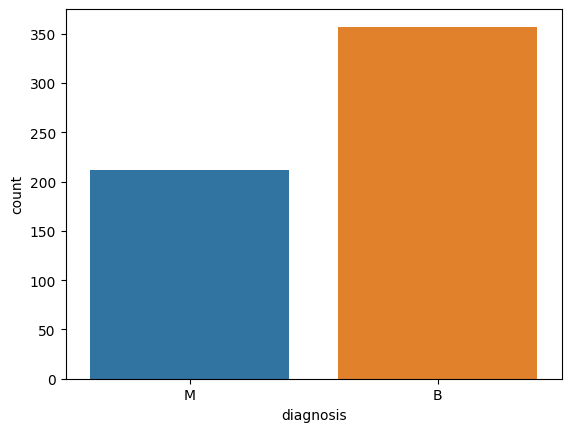

In [11]:
# visualize diagnosis values
sns.countplot(data=df, x='diagnosis', hue='diagnosis')

In [12]:
# check data types
df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

# Encode Categorical Values

In [14]:
# encode diagnosis values
from sklearn.preprocessing import LabelEncoder
label_encoder_y = LabelEncoder()
df.iloc[:, 1] = label_encoder_y.fit_transform(df.iloc[:, 1].values)

<ipython-input-14-ead72f2059ba>:4: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.iloc[:, 1] = label_encoder_y.fit_transform(df.iloc[:, 1].values)


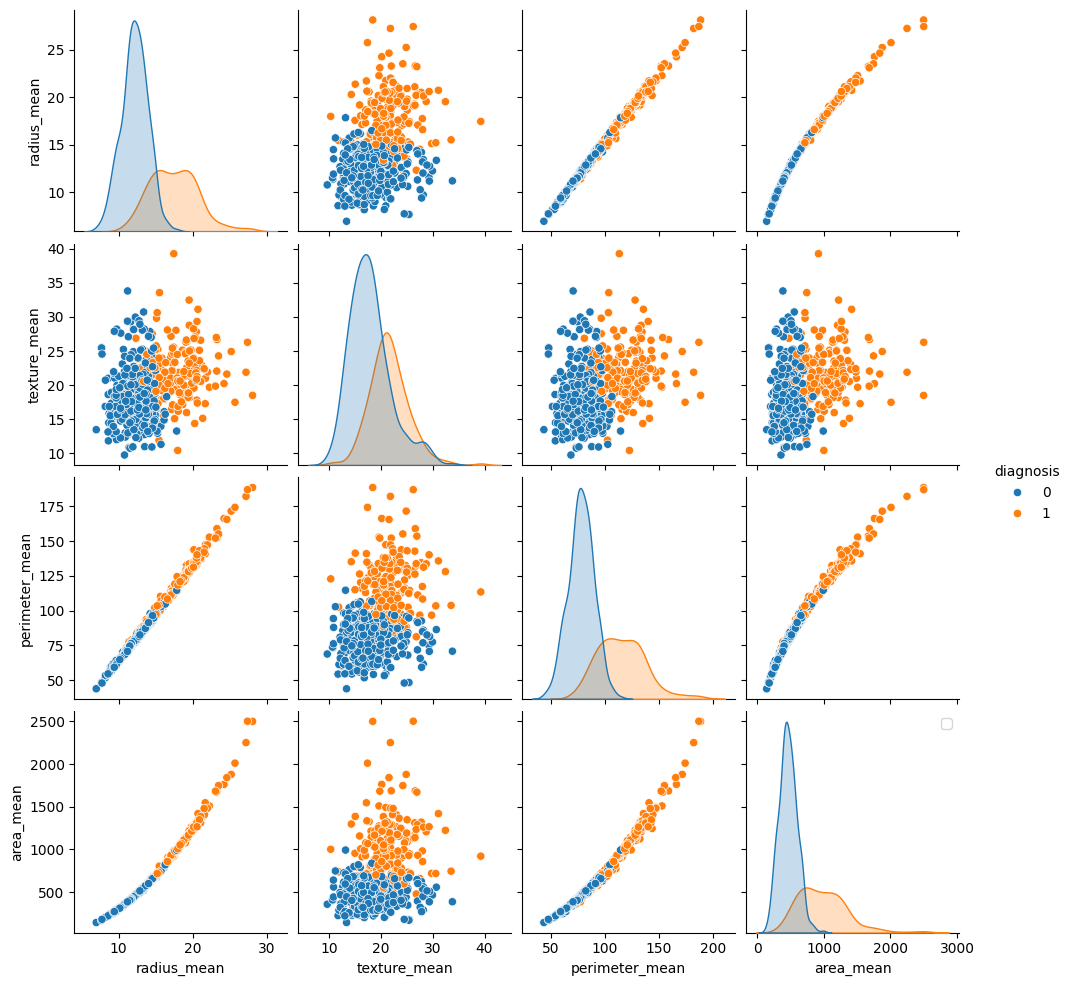

In [19]:
# pair plot for the first 6 features
sns.pairplot(data=df.iloc[:, 1:6], hue='diagnosis')
plt.legend()

<Axes: >

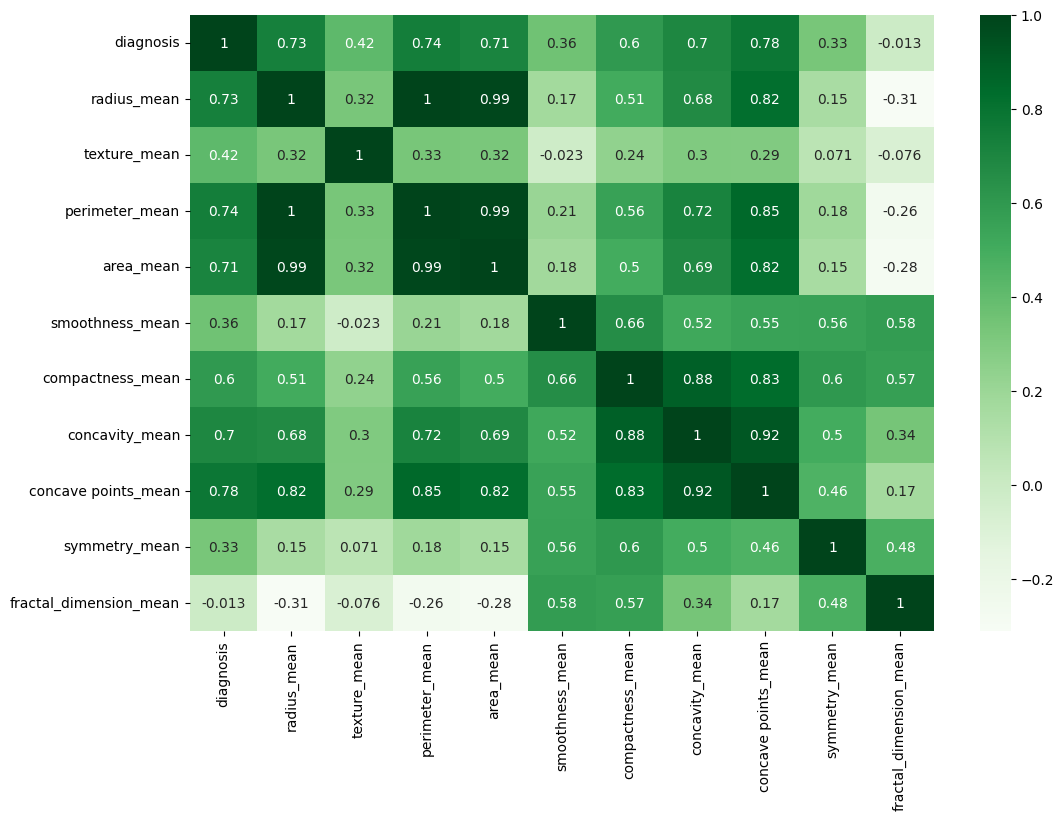

In [23]:
# correlation among columns
plt.figure(figsize=(12, 8))
corr = df.iloc[:, 1:12].corr()
sns.heatmap(data=corr, cmap='Greens', annot=True)

# Training a Model

In [24]:
# split features and labels
X = df.iloc[:, 2:31]
y = df.iloc[:, 1]

In [25]:
# split train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [26]:
# Scale train datasets
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [29]:
# define models
def models(X_train, y_train):

  # Logistic Regression
  from sklearn.linear_model import LogisticRegression
  reg = LogisticRegression(random_state=0)
  reg.fit(X_train, y_train)

  # Decision Tree
  from sklearn.tree import DecisionTreeClassifier
  tree = DecisionTreeClassifier(criterion='entropy', random_state=0)
  tree.fit(X_train, y_train)

  # Random Forest Classifier
  from sklearn.ensemble import RandomForestClassifier
  forest = RandomForestClassifier(criterion='entropy', random_state=0)
  forest.fit(X_train, y_train)

  # print accuracy scores
  models = [reg, tree, forest]
  for i, model in enumerate(models):
    score = model.score(X_train, y_train)
    print(f"{i} {model} accuray: {score}")

  return reg, tree, forest

In [33]:
# run the models
models = models(X_train, y_train)

0 LogisticRegression(random_state=0) accuray: 0.9912087912087912
1 DecisionTreeClassifier(criterion='entropy', random_state=0) accuray: 1.0
2 RandomForestClassifier(criterion='entropy', random_state=0) accuray: 1.0


# Model Evaluation

In [38]:
# confusion matrix
from sklearn.metrics import confusion_matrix
for model in models:
  print(f"Confusion matrix for model: {model}")
  cm = confusion_matrix(y_test, model.predict(X_test))
  print(f"{cm} \n")

Confusion matrix for model: LogisticRegression(random_state=0)
[[66  1]
 [ 3 44]] 

Confusion matrix for model: DecisionTreeClassifier(criterion='entropy', random_state=0)
[[64  3]
 [ 4 43]] 

Confusion matrix for model: RandomForestClassifier(criterion='entropy', random_state=0)
[[65  2]
 [ 3 44]] 



In [40]:
# more defining metrics
from sklearn.metrics import classification_report, accuracy_score

for model in models:
  print(f"{model}'s accuracy: {accuracy_score(y_test, model.predict(X_test))}")
  print(f"Classification report: {classification_report(y_test, model.predict(X_test))} \n")

LogisticRegression(random_state=0)'s accuracy: 0.9649122807017544
Classification report:               precision    recall  f1-score   support

           0       0.96      0.99      0.97        67
           1       0.98      0.94      0.96        47

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114
 

DecisionTreeClassifier(criterion='entropy', random_state=0)'s accuracy: 0.9385964912280702
Classification report:               precision    recall  f1-score   support

           0       0.94      0.96      0.95        67
           1       0.93      0.91      0.92        47

    accuracy                           0.94       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.94      0.94      0.94       114
 

RandomForestClassifier(criterion='entropy', random_state=0)'s accuracy: 0.956140350877193
Classification report:               precision   